# Experiment 1.1
Testing out the effects of changing the number of channels and layers in the single cell spike prediction model. This is not a methodical hyperparameter sweep.

The baseline from which 1.1.1 departed is commit #9363c8

## 1.1.1
Changing the final residual block from 200 -> 100 channels.

Results:
   - train loss decreased slower compared to baseline.
   - training loss eventually reached a similar level
   - validation loss stayed higher  
   - the evaluation notebook gave slightly improved correlation results
   
#### Tensorboard screenshot
Blue is baseline:
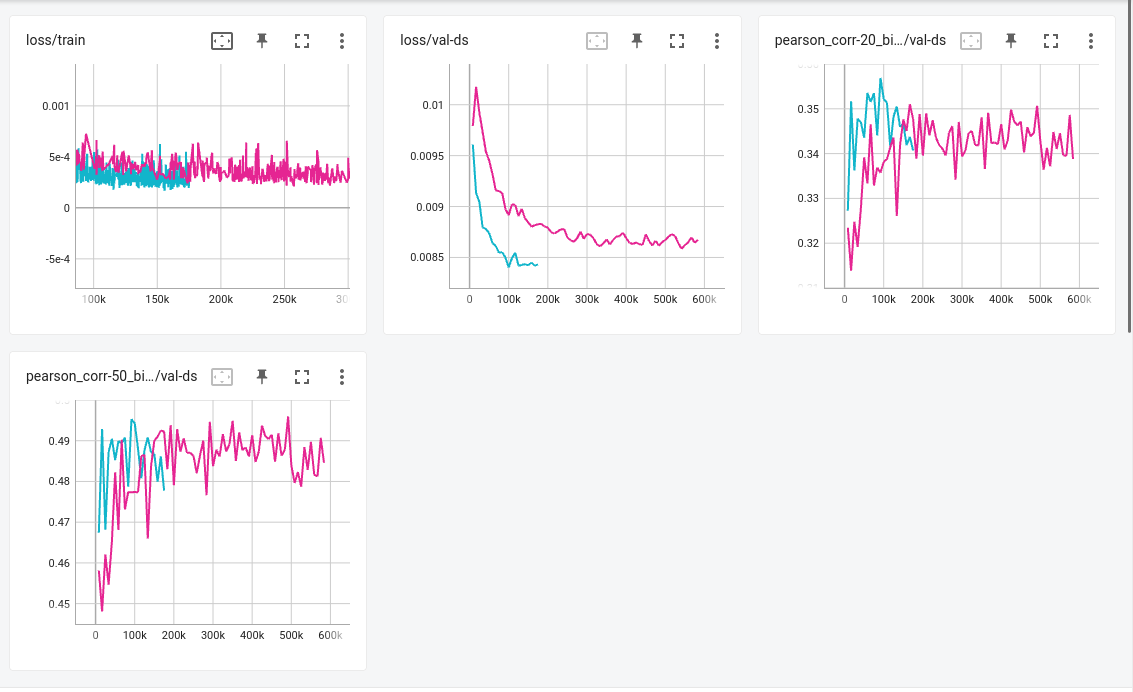

#### Correlation
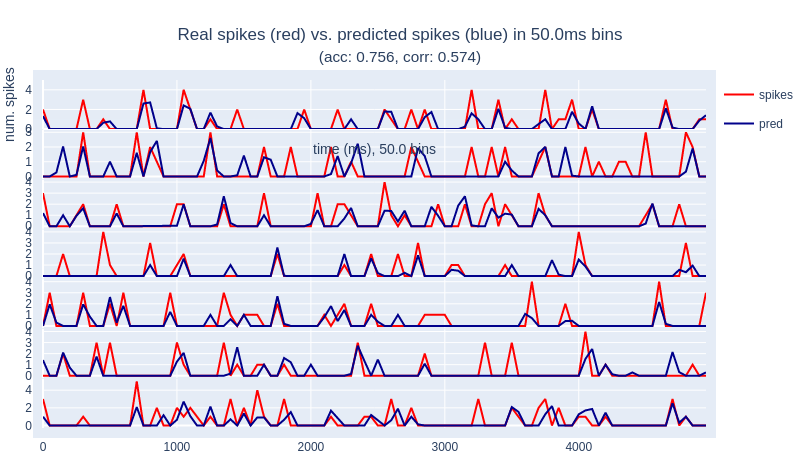

#### Example distfield
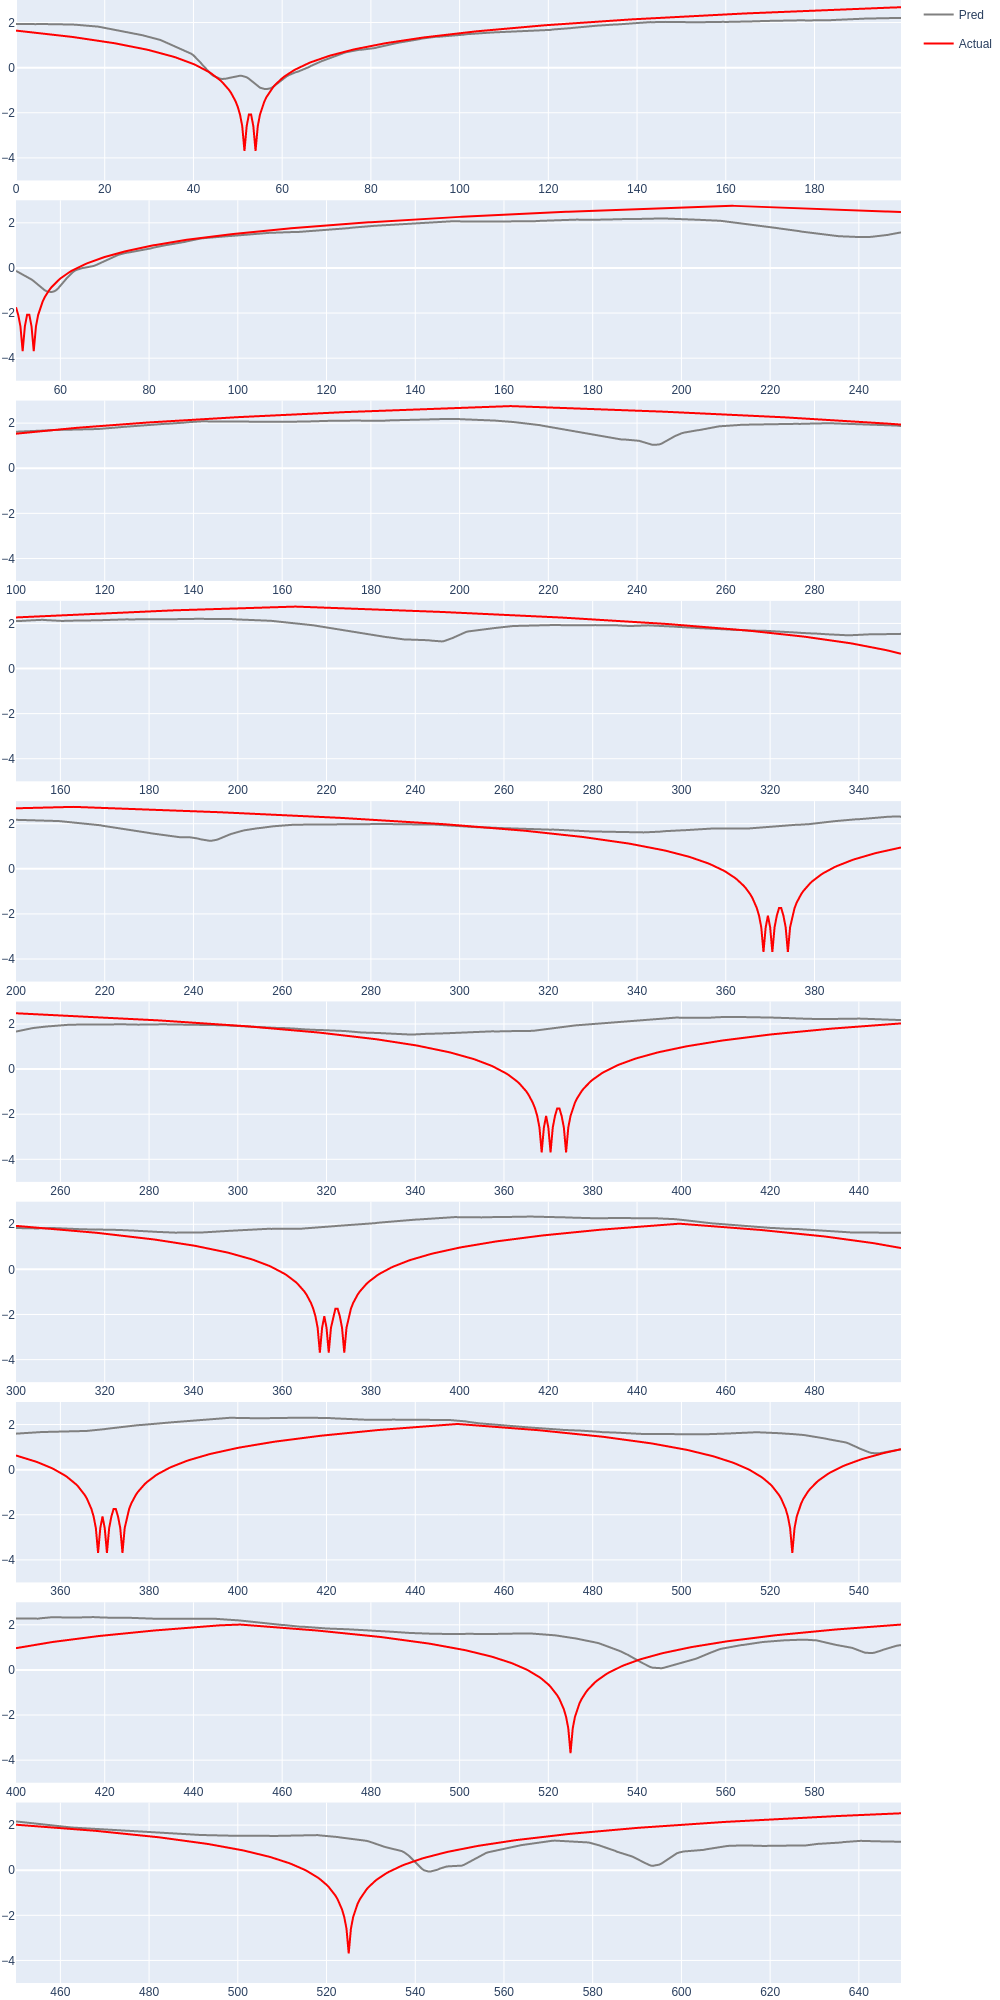

## 1.1.2
With 1.1.1 as baseline, this time layer1 (residual block without stride) is removed. So we are losing 1 out of the 3 residual blocks.

### Results

#### Tensorboard screenshot
Light blue is the original baseline (same as above), dark blue is the results from 1.1.1, and the pink is 1.1.2.

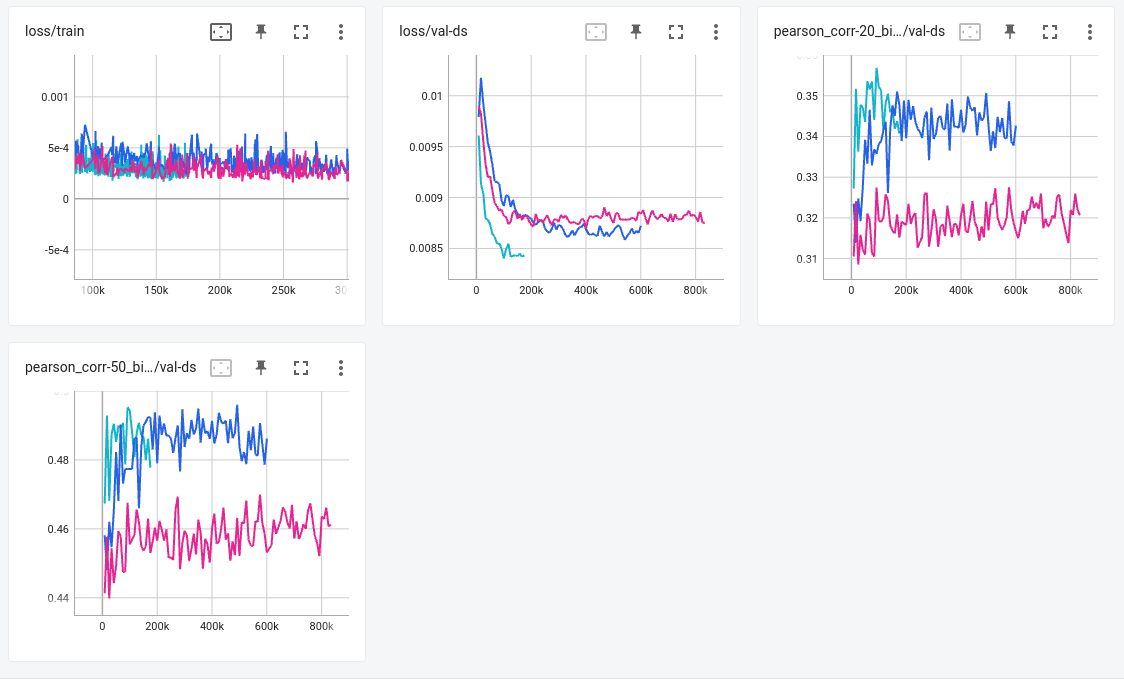

#### Correlation
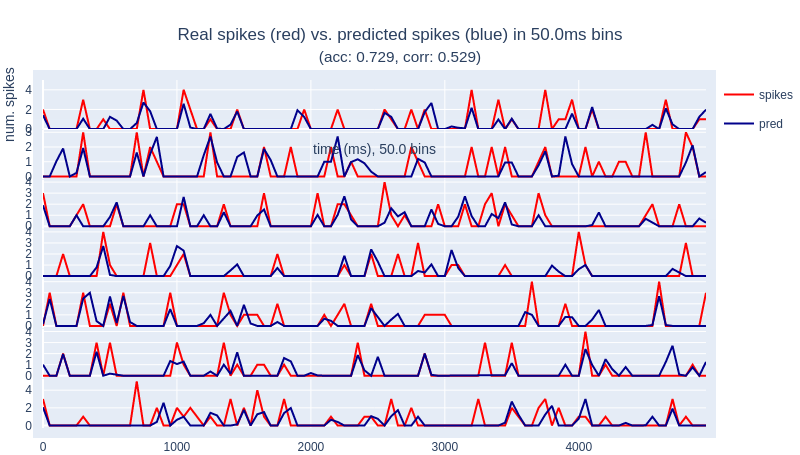

#### Example distfield
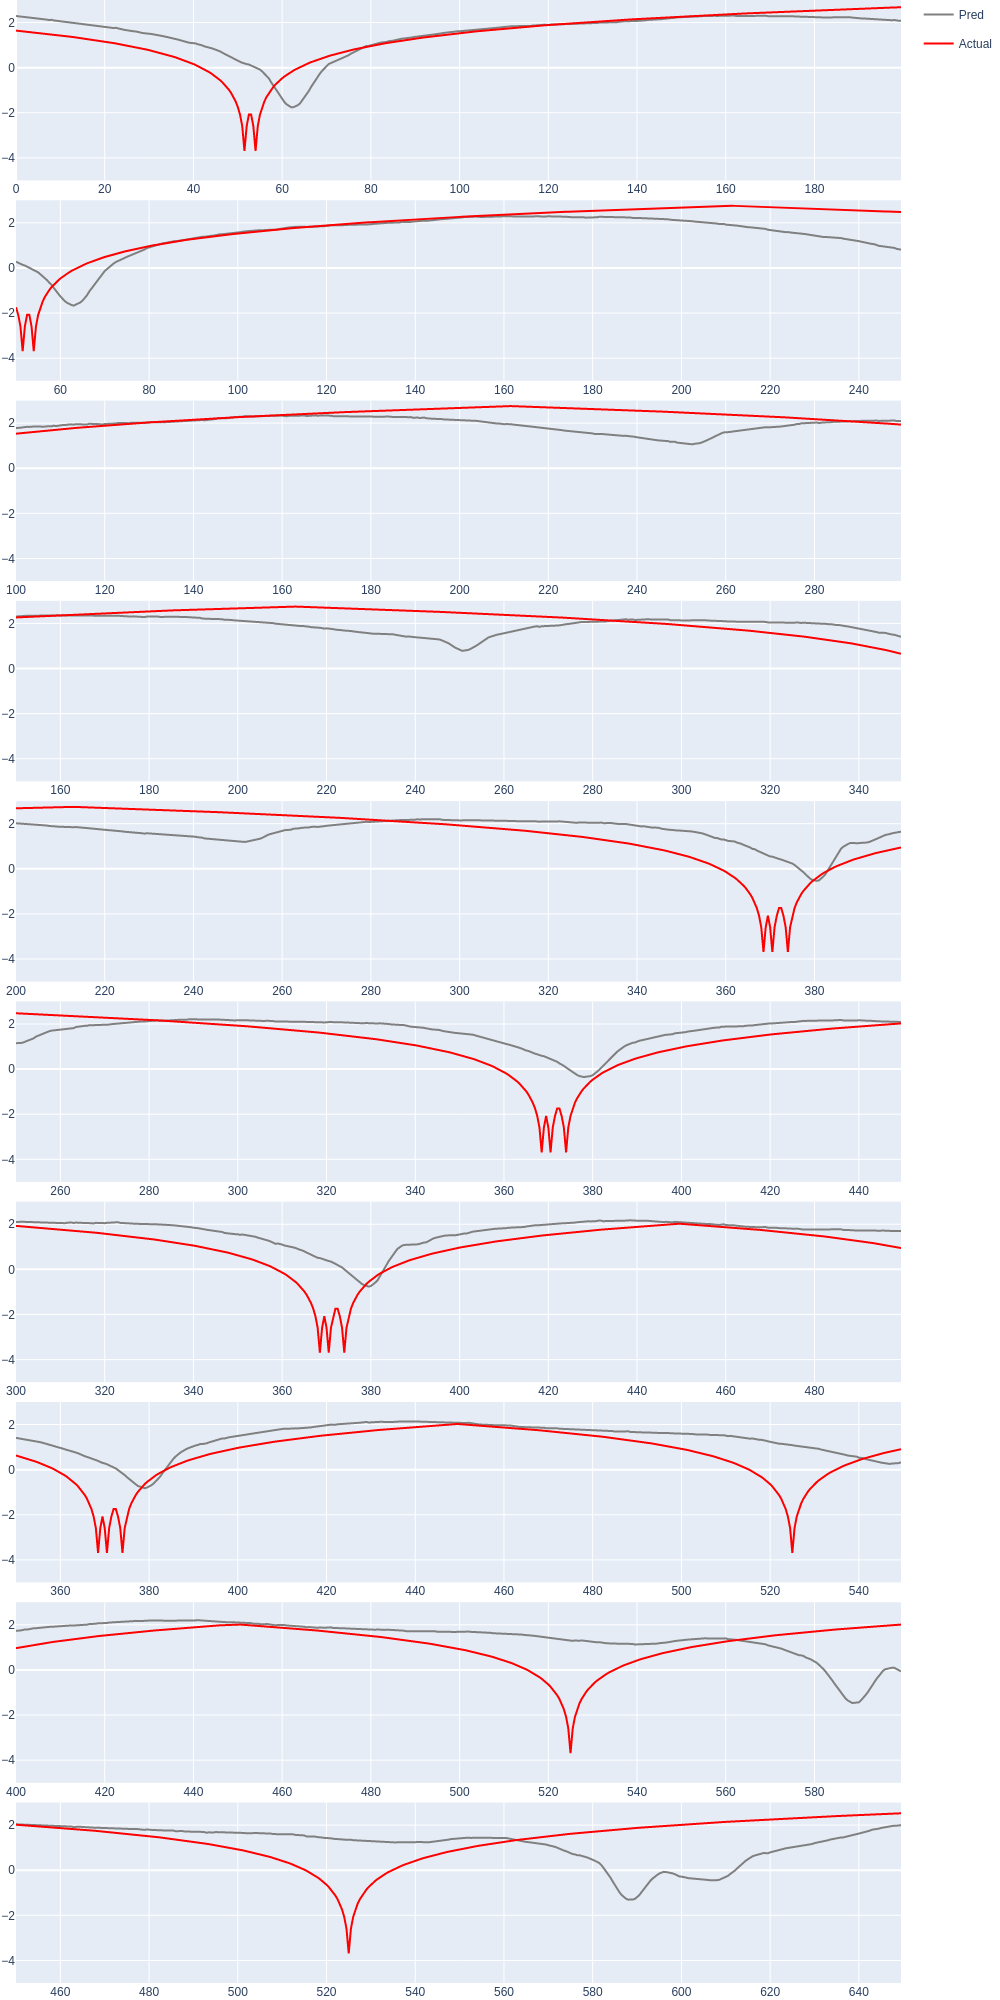

## 1.1.3
This experiment keeps the 100 channels from 1.1.1, but put two residual blocks into layer1, where previously there was 1. In addition, the switch from l1 channel count (20) to l2 channel count (50) happens at the output of the conv1d layer in the head as opposed to the residual block in l2. In short, 1.1.3 represents another layer towards the beginning of the network, and a slight increase in channel count there too.

This experiment got its own commit #1b4849.

### Results

#### Tensorboard screenshot
1.1.3 run is in pink.
<img src="../resources/experiments/exp_1_1_3/tensorflow_capture.png">


#### Correlation
Saved both 50ms and 25ms this time.
<img src="../resources/experiments/exp_1_1_3/corr_1_1_3.png">
<img src="../resources/experiments/exp_1_1_3/corr25ms_1_1_3.png">

#### Distfield example
<img src="../resources/experiments/exp_1_1_3/distfield_1_1_3.png">

#### Distfield example 2
<img src="../resources/experiments/exp_1_1_3/distfield_1_1_3n2.png">

The first distfield was a query for the very beginning of the dataset. The second distfield example was run from the starting point shown in the snippet below. The spacing was also doubled between queries.

### 1.1.4
We go back to 1.1.1, and add in:

  - the improvements to training tha have acrued in the last couple of weeks. These include things like the fix to augmentation randomness (anything else?).
  - the squeeze and excite block.
  - the mean concat on the root.
  
We reverted some changes in order to jump off from 1.1.1. Mainly, reverting the changes of 1.1.3, which involved removing a resnet block and reducing l1 channel counts. We also increased the first kernel size back to 151, as it was set to 21 accidentally at some point while working on the hyper network.

The results were very promising:
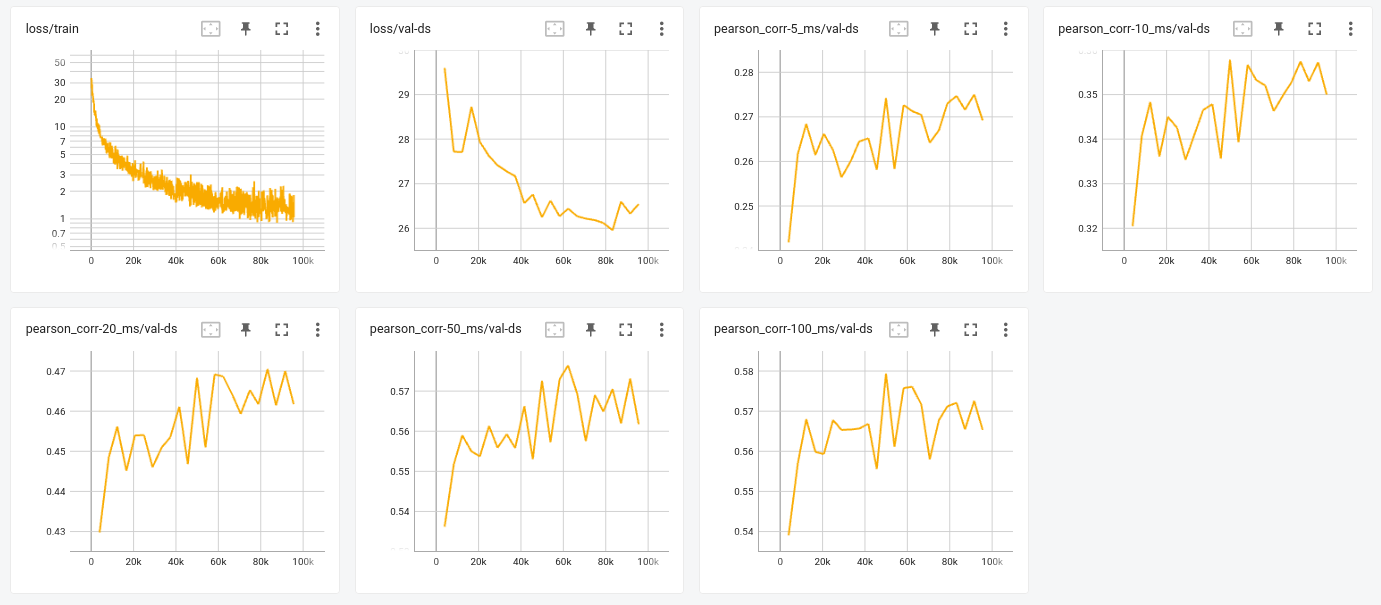
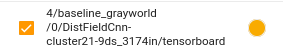
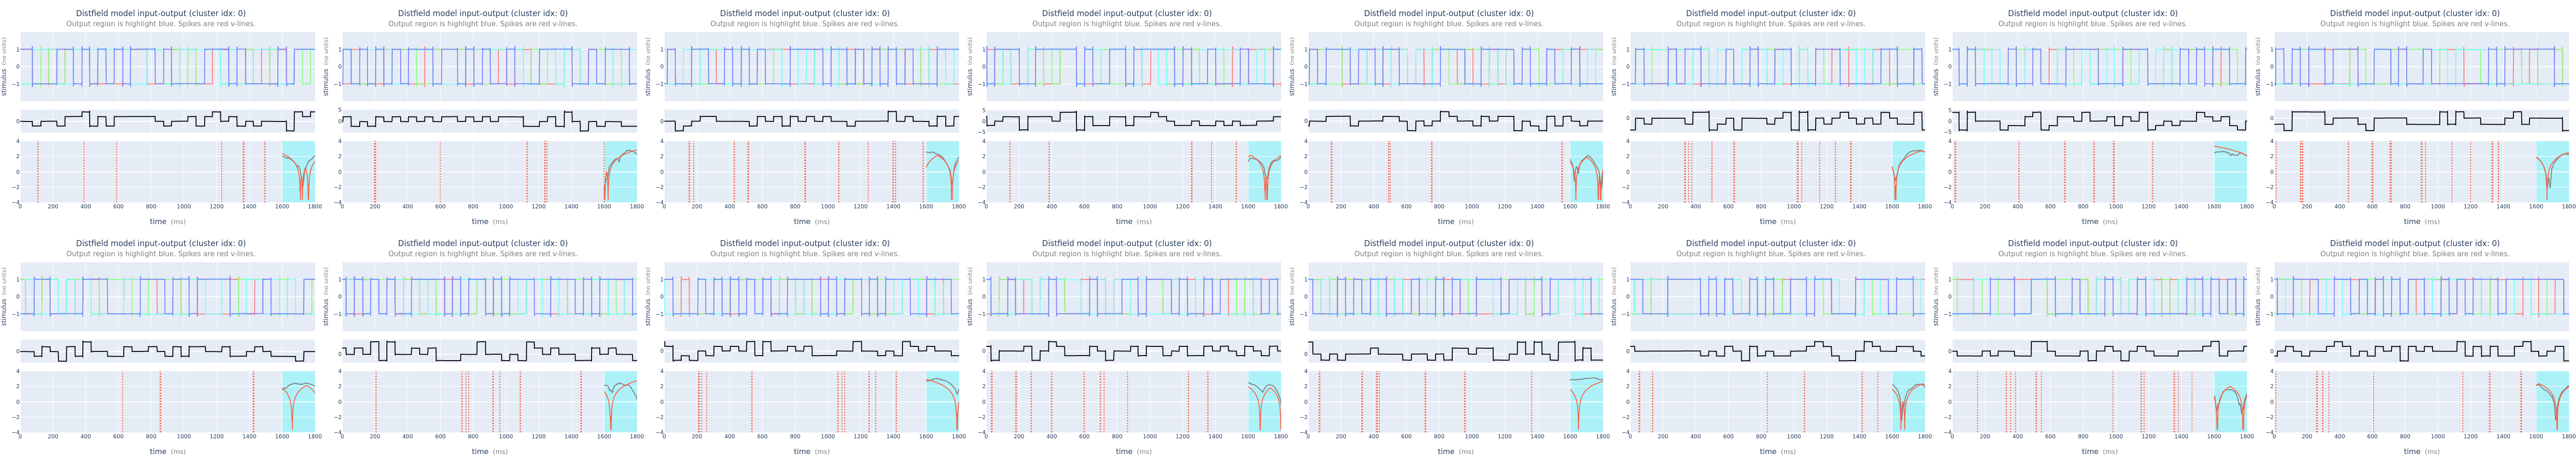